In [1]:
import os
import glob
import math
import pickle
import pandas
import plotly
import numpy as np
import matplotlib.pyplot as plt


# sklearn basic
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# sklearn model
from sklearn import tree
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor


#XGboost
import xgboost as xgb


# ensemble learning
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor




pandas.set_option('display.max_columns', None)

**Read CSV**

In [2]:
df = pandas.read_csv("train.csv", header = 0)
df = df.drop(columns = ["Street", "Utilities", "PoolQC", "GarageYrBlt"])
# df = df.drop(columns = ["Street", "Utilities", "PoolQC", "GarageYrBlt", "MoSold", "YrSold", "YearBuilt", "YearRemodAdd"])

**Result Table**

In [3]:
Result_list = []

**Convert to one-hot**
- MSSubClass, MSZoning, Street, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, Electrical, Functional, GarageType, PavedDrive, Fence, MiscFeature, SaleType, SaleConditionc, Alley

In [4]:
cate_list =["Alley","MSSubClass", "MSZoning", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "Electrical", "Functional", "GarageType", "PavedDrive", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

In [5]:
for c in cate_list:
    lis = []
    for i in df[c].unique():
        if(not isinstance(i, float)):
#             if(not math.isnan(i)):
            lis.append((i))
        
    Type = pandas.DataFrame(columns = sorted(lis, reverse = False)) # create the new dataframe base the all the type key found
    key = list(Type.keys()) # loop over all the types
    count = 0

    for i in df[c].tolist():
        value_list = np.zeros(len(key)).reshape(1,len(key)) # default all 0
        value_list = pandas.DataFrame(value_list, columns = key)
        Type = Type.append(value_list) # append the new row into dataframe
        Type.iloc[count][(i)] = 1 # the select type feature will be 1
        count += 1 # index the current row
        
    for i in Type.keys():
        df[str(c)+str(i)] = Type[i].tolist()
df = df.drop(columns = cate_list)

**Convert to Boolean**

In [6]:
CA_list = df["CentralAir"].tolist()
CA_Convert_list = []
for i in CA_list:
    if(i == "N"):
        CA_Convert_list.append(0)
    else:
        CA_Convert_list.append(1)
df["CentralAir_New"] = CA_Convert_list
df = df.drop(columns = ["CentralAir"])

**Convert to Rank**

- LotShape, LandContour, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC

- OverallQual, OverallCond

In [7]:
LotShape_Convert_list = []
for i in df["LotShape"].tolist():
    if(i == "Reg"):
        LotShape_Convert_list.append(3)
    elif(i == "IR1"):
        LotShape_Convert_list.append(2)
    elif(i == "IR2"):
        LotShape_Convert_list.append(1)
    elif(i == "IR3"):
        LotShape_Convert_list.append(0)
df["LotShape_New"] = LotShape_Convert_list
df = df.drop(columns = ["LotShape"])

In [8]:
LandContour_Convert_list = []
for i in df["LandContour"].tolist():
    if(i == "Lvl"):
        LandContour_Convert_list.append(3)
    elif(i == "Bnk"):
        LandContour_Convert_list.append(2)
    elif(i == "HLS"):
        LandContour_Convert_list.append(1)
    elif(i == "Low"):
        LandContour_Convert_list.append(0)
df["LandContour_New"] = LandContour_Convert_list
df = df.drop(columns = ["LandContour"])

In [9]:
for k in ["ExterCond", "ExterQual", "HeatingQC", "KitchenQual"]:
    ExterQual_Convert_list = []
    for i in df[k].tolist():
        if(i == "Ex"):
            ExterQual_Convert_list.append(4)
        elif(i == "Gd"):
            ExterQual_Convert_list.append(3)
        elif(i == "TA"):
            ExterQual_Convert_list.append(2)
        elif(i == "Fa"):
            ExterQual_Convert_list.append(1)
        elif(i == "Po"):
            ExterQual_Convert_list.append(0)
    df[str(k)+"_New"] = ExterQual_Convert_list
    df = df.drop(columns = [k])

In [10]:
for k in ["BsmtExposure"]:
    ExterQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "Gd"):
                ExterQual_Convert_list.append(4)
            elif(i == "Av"):
                ExterQual_Convert_list.append(3)
            elif(i == "Mn"):
                ExterQual_Convert_list.append(2)
            elif(i == "No"):
                ExterQual_Convert_list.append(1)
        else:
            ExterQual_Convert_list.append(0)


    df[str(k)+"_New"] = ExterQual_Convert_list
    df = df.drop(columns = [k])

In [11]:
for k in ["BsmtCond", "BsmtQual", "FireplaceQu", "GarageQual", "GarageCond"]:
    BsmtQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "Ex"):
                BsmtQual_Convert_list.append(5)
            elif(i == "Gd"):
                BsmtQual_Convert_list.append(4)
            elif(i == "TA"):
                BsmtQual_Convert_list.append(3)
            elif(i == "Fa"):
                BsmtQual_Convert_list.append(2)
            elif(i == "Po"):
                BsmtQual_Convert_list.append(1)
            elif(i == "NA"):
                BsmtQual_Convert_list.append(0)
        else:
            BsmtQual_Convert_list.append(0)


    df[str(k)+"_New"] = BsmtQual_Convert_list
    df = df.drop(columns = [k])

In [12]:
for k in ["BsmtFinType1", "BsmtFinType2"]:
    BsmtQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "GLQ"):
                BsmtQual_Convert_list.append(6)
            elif(i == "ALQ"):
                BsmtQual_Convert_list.append(5)
            elif(i == "Rec"):
                BsmtQual_Convert_list.append(4)
            elif(i == "BLQ"):
                BsmtQual_Convert_list.append(3)
            elif(i == "LwQ"):
                BsmtQual_Convert_list.append(2)
            elif(i == "Unf"):
                BsmtQual_Convert_list.append(1)
            elif(i == "NA"):
                BsmtQual_Convert_list.append(0)
        else:
            BsmtQual_Convert_list.append(0)


    df[str(k)+"_New"] = BsmtQual_Convert_list
    df = df.drop(columns = [k])


In [13]:
for k in ["GarageFinish"]:
    BsmtQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "Fin"):
                BsmtQual_Convert_list.append(3)
            elif(i == "RFn"):
                BsmtQual_Convert_list.append(2)
            elif(i == "Unf"):
                BsmtQual_Convert_list.append(1)
            elif(i == "NA"):
                BsmtQual_Convert_list.append(0)
        else:
            BsmtQual_Convert_list.append(0)
df[str(k)+"_New"] = BsmtQual_Convert_list
df = df.drop(columns = [k])

In [14]:
# replace nan to 0
df["LotFrontage"] = df["LotFrontage"].fillna(0).tolist()
df["MasVnrArea"] = df["MasVnrArea"].fillna(0).tolist()
df = df.drop(columns = ["Id"])


In [15]:
scale_df = df.drop(columns = ["SalePrice"])
keys = list(scale_df.keys())

scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(scale_df)
scale_df = scaler.transform(scale_df)
scale_df = pandas.DataFrame(scale_df, columns = keys)
scale_df["SalePrice"] = df["SalePrice"].tolist()


In [16]:
df = scale_df

**PCA**

In [1]:
candidate_components = range(10, 240, 30)
explained_ratios = []
for c in candidate_components:
    pca = PCA(n_components=c)
    X_pca = pca.fit_transform(df.drop(columns = ["SalePrice"]))
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5, 1.05, .05))
plt.xticks(np.arange(0, 300, 20))

NameError: name 'PCA' is not defined

In [ ]:
Y = df["SalePrice"].tolist()
X = df.drop(columns = ["SalePrice"]).values.tolist()
pca = sklearn.decomposition.PCA(n_components=100)
pca.fit(X)
X = pca.transform(X)


In [ ]:
X.shape

**Dataset**

In [22]:
# sklearn split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(
    df.drop(columns = "SalePrice").values.tolist(), 
    df["SalePrice"].tolist(),
    test_size=0.07, 
    random_state=42)

# stacking dataset or vaild for boosting
Train_Stacking_X = Train_X[:150]
Train_Stacking_Y = Train_Y[:150]

Train_X = Train_X[150:]
Train_Y = Train_Y[150:]

In [ ]:
# pandas shuffle
dataset = shuffle(df)
Test = dataset[:100]
Train = dataset[100:]

Train_Stacking = Train[:300]
Train = Train[300:]

Test_X = Test.drop(columns = "SalePrice").values.tolist()
Test_Y = Test["SalePrice"].tolist()

Train_X = Train.drop(columns = "SalePrice").values.tolist()
Train_Y = Train["SalePrice"].tolist()

Train_Stacking_X = Train_Stacking.drop(columns = "SalePrice").values.tolist()
Train_Stacking_Y = Train_Stacking["SalePrice"].tolist()

In [ ]:
# After PCA
Test = X[:100]
Train = X[100:]

Test_X = Test
Test_Y = Y[:100]

Train_X = Train
Train_Y = Y[100:]

## Machine Learning Model

In [ ]:
rng = np.random.RandomState(1)

**Adam Boost**

In [57]:
# Adam boost for the model and return the best selection via given datasets
def Ada_Model(model, Train_X, Train_Y, Vail_X, Vail_Y):
    highest = 0
    coeff = 0
    rng = np.random.RandomState(1)
    for i in range(1, 20):
        AdaBoost_model = AdaBoostRegressor(base_estimator=model, n_estimators=i, random_state=rng)
        AdaBoost_model.fit(Train_X, Train_Y)
        curr_score = AdaBoost_model.score(Vail_X, Vail_Y)
        if(highest < curr_score):
            highest = curr_score
            coeff = i
    return coeff, highest


**Bagging**

In [58]:
def Bagging(model, Train_X, Train_Y, Vail_X, Vail_Y):  
    highest = 0
    coeff = 0
    rng = np.random.RandomState(1)
    for i in range(1, 20):
        Bagging_Model = BaggingRegressor(base_estimator= model, n_estimators = i, bootstrap=True, warm_start=False) #
        Bagging_Model.fit(Train_X, Train_Y)
        curr_score = Bagging_Model.score(Vail_X, Vail_Y)
        if(highest < curr_score):
            highest = curr_score
            coeff = i
    return coeff, highest

# sklearn.ensemble.BaggingRegressor(base_estimator=None, 
# n_estimators=10, 
# max_samples=1.0, 
# max_features=1.0, 
# bootstrap=True, 
# bootstrap_features=False, 
# oob_score=False, 
# warm_start=False, 
# n_jobs=None, 
# random_state=None, verbose=0)

**Gradient Boosting**

In [59]:
def GBDT(model, Train_X, Train_Y, Vail_X, Vail_Y):
    coeff = 0
    highest = 0
    _range = np.arange(0.01, 1, 0.05)
    for i in (_range):
        GBDT = GradientBoostingRegressor(init = model, learning_rate = i)
        GBDT.fit(Train_X, Train_Y)
        curr_score = GBDT.score(Train_Stacking_X, Train_Stacking_Y)
        if(highest < curr_score):
            highest = curr_score
            coeff = i
    return coeff, highest

**Neural Network**

In [ ]:
NN = MLPRegressor(solver='adam',  # weight optimization
                    activation='relu',  # activation function
                    alpha=1e-2, # Regularizer value
                    learning_rate_init = 0.1,
                    hidden_layer_sizes=(30,20,5), # layer and node (node,node) --> numbers of layers

                  random_state=1, #random state
                    max_iter = 1000, # max iteration
                    early_stopping = True) # early stop

NN.fit(Train_X, Train_Y) # fit the neural network


In [ ]:
NN.score(Train_X, Train_Y)

In [ ]:
NN.score(Test_X, Test_Y)

In [ ]:
coeff, highest = Bagging(NN, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
Bagging_NN = BaggingRegressor(base_estimator= NN, n_estimators = coeff, bootstrap=True, warm_start=False) #
Bagging_NN.fit(Train_X, Train_Y)
Bagging_NN.score(Train_X, Train_Y)

In [ ]:
Bagging_NN.score(Test_X, Test_Y)

In [ ]:
# Boosting Net
coeff, highest = Ada_Model(Bagging_NN, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
# for i in range(0,3):
AdaBoost_NN = AdaBoostRegressor(base_estimator=Bagging_NN, n_estimators=coeff, random_state=rng)
AdaBoost_NN.fit(Train_X, Train_Y)
AdaBoost_NN.score(Train_X, Train_Y)

In [ ]:
AdaBoost_NN.score(Test_X,Test_Y)

In [ ]:
coeff, highest = GBDT(Bagging_NN, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
GBDT_NN = GradientBoostingRegressor(init = Bagging_NN, learning_rate = coeff)
GBDT_NN.fit(Train_X, Train_Y)
GBDT_NN.score(Train_X, Train_Y)

In [ ]:
GBDT_NN.score(Test_X, Test_Y)

In [ ]:
Result_list.append(["NN", 
                    NN.score(Test_X, Test_Y), 
                    Bagging_NN.score(Test_X, Test_Y),
                    AdaBoost_NN.score(Test_X, Test_Y), 
                    GBDT_NN.score(Test_X, Test_Y)])

In [ ]:
# save the model to disk
lis = [NN, Bagging_NN, AdaBoost_NN, GBDT_NN]
lis_tag = ["NN", "Bagging_NN", "AdaBoost_NN", "GBDT_NN"]
for i in range(0,len(lis)):
    filename = os.getcwd()+'/NN Model/'+str(lis_tag[i])+'.sav'
    pickle.dump(lis[i], open(filename, 'wb'))




**Elastic Net + Adam Boost**

In [ ]:
Net = ElasticNet(random_state=0, warm_start = True)
Net.fit(Train_X, Train_Y)  
Net.score(Train_X,Train_Y)

In [ ]:
Net.score(Test_X,Test_Y)

In [ ]:
coeff, highest = Bagging(Net, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
Bagging_Net = BaggingRegressor(base_estimator =  Net, n_estimators = coeff, bootstrap=True, warm_start=False)
Bagging_Net.fit(Train_X, Train_Y)
Bagging_Net.score(Test_X, Test_Y)

In [ ]:
# Boosting Net
coeff, highest = Ada_Model(Bagging_Net, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
# for i in range(0,3):
AdaBoost_Net = AdaBoostRegressor(base_estimator=Bagging_Net, n_estimators=coeff, random_state=rng)
AdaBoost_Net.fit(Train_X, Train_Y)
AdaBoost_Net.score(Train_X, Train_Y)

In [ ]:
AdaBoost_Net.score(Test_X,Test_Y)

In [ ]:
coeff, highest = GBDT(Bagging_Net, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
GBDT_Net = GradientBoostingRegressor(init = Bagging_Net, learning_rate = coeff)
GBDT_Net.fit(Train_X, Train_Y)
GBDT_Net.score(Train_X, Train_Y)

In [ ]:
GBDT_Net.score(Test_X, Test_Y)

In [ ]:
Result_list.append(["Net", 
                    Net.score(Test_X, Test_Y), 
                    Bagging_Net.score(Test_X, Test_Y), 
                    AdaBoost_Net.score(Test_X, Test_Y), 
                    GBDT_Net.score(Test_X, Test_Y)])

In [ ]:
# save the model to disk
lis = [Net, Bagging_Net, AdaBoost_Net, GBDT_Net]
lis_tag = ["Net", "Bagging_Net", "AdaBoost_Net", "GBDT_Net"]
for i in range(0,len(lis)):
    filename = os.getcwd()+'/Net Model/'+str(lis_tag[i])+'.sav'
    pickle.dump(lis[i], open(filename, 'wb'))





**Ridge Regression**

In [ ]:
highest = 0
coeff = 0
for i in np.arange(0, 10, 0.1): # find the best regularizer value
    ridge = Ridge(alpha=i)
    ridge.fit(Train_X, Train_Y)
#     ridge.score(Train_X, Train_Y)
    curr_score = ridge.score(Train_Stacking_X, Train_Stacking_Y)
    if(highest < curr_score):
        highest = curr_score
        coeff = i

In [ ]:
highest,coeff

In [ ]:
ridge = Ridge(alpha=coeff)
ridge.fit(Train_X, Train_Y)
ridge.score(Train_X, Train_Y)

In [2]:
ridge.score(Test_X, Test_Y)

NameError: name 'ridge' is not defined

In [ ]:
coeff, highest = Bagging(ridge, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
Bagging_ridge = BaggingRegressor(base_estimator =  ridge, n_estimators = coeff, bootstrap=True, warm_start=False)
Bagging_ridge.fit(Train_X, Train_Y)
Bagging_ridge.score(Test_X, Test_Y)

In [ ]:
# Boosting Net
coeff, highest = Ada_Model(Bagging_ridge, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
# for i in range(0,3):
AdaBoost_ridge = AdaBoostRegressor(base_estimator=Bagging_ridge, n_estimators=coeff, random_state=rng)
AdaBoost_ridge.fit(Train_X, Train_Y)
AdaBoost_ridge.score(Train_X, Train_Y)

In [ ]:
AdaBoost_ridge.score(Test_X, Test_Y)

In [ ]:
coeff, highest = GBDT(Bagging_ridge, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
GBDT_ridge = GradientBoostingRegressor(init = ridge, learning_rate = coeff)
GBDT_ridge.fit(Train_X, Train_Y)
GBDT_ridge.score(Train_X, Train_Y)

In [ ]:
GBDT_ridge.score(Test_X, Test_Y)

In [ ]:
Result_list.append(["Ridge", 
                    ridge.score(Test_X, Test_Y), 
                    Bagging_ridge.score(Test_X, Test_Y), 
                    AdaBoost_ridge.score(Test_X, Test_Y), 
                    GBDT_ridge.score(Test_X, Test_Y)])

In [ ]:
# save the model to disk
lis = [ridge, Bagging_ridge, AdaBoost_ridge, GBDT_ridge]
lis_tag = ["ridge", "Bagging_ridge", "AdaBoost_ridge", "GBDT_ridge"]
for i in range(0,len(lis)):
    filename = os.getcwd()+'/Ridge Model/'+str(lis_tag[i])+'.sav'
    pickle.dump(lis[i], open(filename, 'wb'))






**Linear Regression**

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(Train_X, Train_Y)

In [ ]:
lr.score(Train_X, Train_Y)

In [ ]:
lr.score(Test_X, Test_Y)

**Decision Tree**

In [ ]:
coeff = 0
highest = 0
for i in range(1,10):
    Tree = tree.DecisionTreeRegressor(max_depth = i)
    Tree.fit(Train_X, Train_Y)
    curr_score = Tree.score(Train_Stacking_X, Train_Stacking_Y)
    if(highest < curr_score):
        highest = curr_score
        coeff = i


In [ ]:
highest, coeff

In [ ]:
Tree = tree.DecisionTreeRegressor(max_depth = coeff)
Tree.fit(Train_X, Train_Y)
Tree.score(Train_X,Train_Y)

In [ ]:
Tree.score(Test_X,Test_Y)

In [ ]:
coeff, highest = Bagging(Tree, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
Bagging_Tree = BaggingRegressor(base_estimator =  Tree, n_estimators = coeff, bootstrap=True, warm_start=False)
Bagging_Tree.fit(Train_X, Train_Y)
Bagging_Tree.score(Train_X, Train_Y)

In [ ]:
Bagging_Tree.score(Test_X, Test_Y)

In [ ]:
coeff, highest = Ada_Model(Bagging_Tree, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
AdaBoost_Tree = AdaBoostRegressor(base_estimator=Bagging_Tree, n_estimators=coeff, random_state=rng)
AdaBoost_Tree.fit(Train_X, Train_Y)
AdaBoost_Tree.score(Train_X, Train_Y)

In [ ]:
AdaBoost_Tree.score(Test_X, Test_Y)

In [ ]:
coeff, highest = GBDT(Bagging_Tree, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
GBDT_Tree = GradientBoostingRegressor(init = Bagging_Tree, learning_rate = coeff)
GBDT_Tree.fit(Train_X, Train_Y)
GBDT_Tree.score(Train_X, Train_Y)

In [ ]:
GBDT_Tree.score(Test_X, Test_Y)

In [ ]:
Result_list.append(["Tree", 
                    Tree.score(Test_X, Test_Y), 
                    Bagging_Tree.score(Test_X, Test_Y), 
                    AdaBoost_Tree.score(Test_X, Test_Y), 
                    GBDT_Tree.score(Test_X, Test_Y)])

In [ ]:
# save the model to disk
lis = [Tree, Bagging_Tree, AdaBoost_Tree, GBDT_Tree]
lis_tag = ["Tree", "Bagging_Tree", "AdaBoost_Tree", "GBDT_Tree"]
for i in range(0,len(lis)):
    filename = os.getcwd()+'/Tree Model/'+str(lis_tag[i])+'.sav'
    pickle.dump(lis[i], open(filename, 'wb'))







**Bayesian Ridge**

In [ ]:
BR = BayesianRidge()
BR.fit(Train_X, Train_Y)
BR.score(Train_X, Train_Y)

In [ ]:
BR.score(Test_X, Test_Y)

In [ ]:
coeff, highest = Bagging(BR, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
Bagging_BR = BaggingRegressor(base_estimator =  BR, n_estimators = coeff, bootstrap=True, warm_start=False)
Bagging_BR.fit(Train_X, Train_Y)
Bagging_BR.score(Train_X, Train_Y)

In [ ]:
Bagging_BR.score(Test_X, Test_Y)

In [ ]:
# Boosting Net
coeff, highest = Ada_Model(Bagging_BR, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
# for i in range(0,3):
AdaBoost_BR = AdaBoostRegressor(base_estimator=Bagging_BR, n_estimators=coeff, random_state=rng)
AdaBoost_BR.fit(Train_X, Train_Y)
AdaBoost_BR.score(Train_X, Train_Y)

In [ ]:
AdaBoost_BR.score(Test_X, Test_Y)

In [ ]:
coeff, highest = GBDT(Bagging_BR, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
GBDT_BR = GradientBoostingRegressor(init = ridge, learning_rate = coeff)
GBDT_BR.fit(Train_X, Train_Y)
GBDT_BR.score(Train_X, Train_Y)

In [ ]:
GBDT_BR.score(Test_X, Test_Y)

In [ ]:
Result_list.append(["BR", 
                    BR.score(Test_X, Test_Y), 
                    Bagging_BR.score(Test_X, Test_Y), 
                    AdaBoost_BR.score(Test_X, Test_Y), 
                    GBDT_BR.score(Test_X, Test_Y)])

In [ ]:
# save the model to disk
lis = [BR, Bagging_BR, AdaBoost_BR, GBDT_BR]
lis_tag = ["BR", "Bagging_BR", "AdaBoost_BR", "GBDT_BR"]
for i in range(0,len(lis)):
    filename = os.getcwd()+'/BR Model/'+str(lis_tag[i])+'.sav'
    pickle.dump(lis[i], open(filename, 'wb'))


**KNR**

In [ ]:
n = 100
highest = 0
node = 0
for i in range(1,100):
    neigh = KNeighborsRegressor(n_neighbors = i, algorithm = "auto", weights = "distance") #n_neighbors=2
    neigh.fit(Train_X, Train_Y) 
#     curr_score = neigh.score(Train_X[:n], Train_Y[:n])
    curr_score = neigh.score(Train_Stacking_X, Train_Stacking_Y)
    if(highest < curr_score):
        highest = curr_score
        node = i

In [ ]:
node, highest

In [ ]:
KNR = KNeighborsRegressor(n_neighbors = node, algorithm = "auto", weights = "distance") #n_neighbors=2
KNR.fit(Train_X, Train_Y) 
KNR.score(Test_X, Test_Y)

In [ ]:
KNR.score(Test_X, Test_Y)

In [ ]:
coeff, highest = Bagging(KNR, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
Bagging_KNR = BaggingRegressor(base_estimator =  KNR, n_estimators = coeff, bootstrap=False, warm_start=True)
Bagging_KNR.fit(Train_X, Train_Y)
Bagging_KNR.score(Train_X, Train_Y)

In [ ]:
Bagging_KNR.score(Test_X, Test_Y)

In [ ]:
coeff, highest = Ada_Model(Bagging_KNR, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
AdaBoost_KNR = AdaBoostRegressor(base_estimator=Bagging_KNR, n_estimators=coeff, random_state=rng)
AdaBoost_KNR.fit(Train_X, Train_Y)
AdaBoost_KNR.score(Train_X, Train_Y)

In [ ]:
AdaBoost_KNR.score(Test_X, Test_Y)

In [ ]:
coeff, highest = GBDT(Bagging_KNR, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
GBDT_KNR = GradientBoostingRegressor(init = Bagging_KNR, learning_rate = coeff)
GBDT_KNR.fit(Train_X, Train_Y)
GBDT_KNR.score(Train_X, Train_Y)

In [ ]:
GBDT_KNR.score(Test_X, Test_Y)

In [ ]:
Result_list.append(["KNR", 
                    KNR.score(Test_X, Test_Y), 
                    Bagging_KNR.score(Test_X, Test_Y),
                    AdaBoost_KNR.score(Test_X, Test_Y), 
                    GBDT_KNR.score(Test_X, Test_Y)])

In [ ]:
# save the model to disk
lis = [KNR, Bagging_KNR, AdaBoost_KNR, GBDT_KNR]
lis_tag = ["KNR", "Bagging_KNR", "AdaBoost_KNR", "GBDT_KNR"]
for i in range(0,len(lis)):
    filename = os.getcwd()+'/KNR Model/'+str(lis_tag[i])+'.sav'
    pickle.dump(lis[i], open(filename, 'wb'))



**SVR**

In [ ]:
svr_poly = SVR(kernel='poly', C=1e7, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly.fit(Train_X, Train_Y)
svr_poly.score(Train_X,Train_Y)

In [ ]:
svr_poly.score(Test_X,Test_Y)

In [ ]:
coeff, highest = Bagging(svr_poly, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
Bagging_svr = BaggingRegressor(base_estimator =  svr_poly, n_estimators = coeff, bootstrap=False, warm_start=True)
Bagging_svr.fit(Train_X, Train_Y)
Bagging_svr.score(Train_X, Train_Y)

In [ ]:
Bagging_svr.score(Test_X, Test_Y)

In [ ]:
coeff, highest = Ada_Model(Bagging_svr, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
AdaBoost_svr = AdaBoostRegressor(base_estimator=Bagging_svr, n_estimators=coeff, random_state=rng)
AdaBoost_svr.fit(Train_X, Train_Y)
AdaBoost_svr.score(Train_X, Train_Y)

In [ ]:
AdaBoost_svr.score(Test_X, Test_Y)

In [ ]:
coeff, highest = GBDT(Bagging_svr, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
GBDT_svr = GradientBoostingRegressor(init = Bagging_svr, learning_rate = coeff)
GBDT_svr.fit(Train_X, Train_Y)
GBDT_svr.score(Train_X, Train_Y)

In [ ]:
GBDT_svr.score(Test_X, Test_Y)

In [ ]:
Result_list.append(["SVR", 
                    svr_poly.score(Test_X, Test_Y), 
                    Bagging_svr.score(Test_X, Test_Y), 
                    AdaBoost_svr.score(Test_X, Test_Y), 
                    GBDT_svr.score(Test_X, Test_Y)])

In [ ]:
# save the model to disk
lis = [svr_poly, Bagging_svr, AdaBoost_svr, GBDT_svr]
lis_tag = ["svr_poly", "Bagging_svr", "AdaBoost_svr", "GBDT_svr"]
for i in range(0,len(lis)):
    filename = os.getcwd()+'/SVR Model/'+str(lis_tag[i])+'.sav'
    pickle.dump(lis[i], open(filename, 'wb'))




**XGBoost**

In [26]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.5,
                          max_depth = 5, 
                          alpha = 3, 
                          n_estimators = 10)

In [51]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1)
xg_reg.fit(Train_X,Train_Y)

[23:24:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [52]:
xg_reg.score(Train_X, Train_Y)

0.9661538277704925

In [54]:
xg_reg.score(Test_X, Test_Y)

0.8124722574375403

In [60]:
coeff, highest = Bagging(xg_reg, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

[23:29:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:30:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:32:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

(10, 0.9156716345635395)

In [61]:
Bagging_xg_reg = BaggingRegressor(base_estimator =  xg_reg, n_estimators = coeff, bootstrap=False, warm_start=True)
Bagging_xg_reg.fit(Train_X, Train_Y)
Bagging_xg_reg.score(Train_X, Train_Y)

[23:33:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

0.9657278904258575

In [62]:
Bagging_xg_reg.score(Test_X, Test_Y)

0.8100043815170316

In [ ]:
coeff, highest = Ada_Model(Bagging_xg_reg, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

[23:34:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:35:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:36:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:37:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:39:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:41:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [ ]:
AdaBoost_xg_reg = AdaBoostRegressor(base_estimator=Bagging_xg_reg, n_estimators=coeff, random_state=rng)
AdaBoost_xg_reg.fit(Train_X, Train_Y)
AdaBoost_xg_reg.score(Train_X, Train_Y)

In [ ]:
AdaBoost_xg_reg.score(Test_X, Test_Y)

In [ ]:
coeff, highest = GBDT(Bagging_svr, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

In [ ]:
GBDT_xg_reg = GradientBoostingRegressor(init = Bagging_xg_reg, learning_rate = coeff)
GBDT_xg_reg.fit(Train_X, Train_Y)
GBDT_xg_reg.score(Train_X, Train_Y)

In [ ]:
GBDT_xg_reg.score(Test_X, Test_Y)

## Load Model

In [17]:
model = [
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/BR Model/AdaBoost_BR.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/BR Model/Bagging_BR.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/BR Model/GBDT_BR.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/BR Model/Raw BR.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Tree Model/AdaBoost_Tree.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Tree Model/Bagging_Tree.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Tree Model/GBDT_Tree.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Tree Model/Raw Tree.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Net Model/AdaBoost_Net.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Net Model/Bagging_Net.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Net Model/GBDT_Net.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Net Model/Raw Net.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/NN Model/AdaBoost_NN.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/NN Model/Bagging_NN.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/NN Model/GBDT_NN.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/NN Model/Raw NN.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Ridge Model/AdaBoost_ridge.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Ridge Model/Bagging_ridge.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Ridge Model/GBDT_ridge.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Ridge Model/Raw ridge.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/SVR Model/AdaBoost_svr.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/SVR Model/Bagging_svr.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/SVR Model/GBDT_svr.sav",
"/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/SVR Model/Raw svr_poly.sav",
"/Users/po-hungyeh/Desktop/KNR Model/AdaBoost_KNR.sav",
"/Users/po-hungyeh/Desktop/KNR Model/Bagging_KNR.sav",
"/Users/po-hungyeh/Desktop/KNR Model/GBDT_KNR.sav",
"/Users/po-hungyeh/Desktop/KNR Model/Raw KNR.sav"
]


In [18]:
AdaBoost_BR = pickle.load(open(model[0], 'rb'))
Bagging_BR = pickle.load(open(model[1], 'rb'))
GBDT_BR = pickle.load(open(model[2], 'rb'))
Raw_BR = pickle.load(open(model[3], 'rb'))
AdaBoost_Tree = pickle.load(open(model[4], 'rb'))
Bagging_Tree = pickle.load(open(model[5], 'rb'))
GBDT_Tree = pickle.load(open(model[6], 'rb'))
Raw_Tree = pickle.load(open(model[7], 'rb'))
AdaBoost_Net = pickle.load(open(model[8], 'rb'))
Bagging_Net = pickle.load(open(model[9], 'rb'))
GBDT_Net = pickle.load(open(model[10], 'rb'))
Raw_Net = pickle.load(open(model[11], 'rb'))
AdaBoost_NN = pickle.load(open(model[12], 'rb'))
Bagging_NN = pickle.load(open(model[13], 'rb'))
GBDT_NN = pickle.load(open(model[14], 'rb'))
Raw_NN = pickle.load(open(model[15], 'rb'))
AdaBoost_ridge = pickle.load(open(model[16], 'rb'))
Bagging_ridge = pickle.load(open(model[17], 'rb'))
GBDT_ridge = pickle.load(open(model[18], 'rb'))
Raw_ridge = pickle.load(open(model[19], 'rb'))
AdaBoost_svr = pickle.load(open(model[20], 'rb'))
Bagging_svr = pickle.load(open(model[21], 'rb'))
GBDT_svr = pickle.load(open(model[22], 'rb'))
Raw_svr = pickle.load(open(model[23], 'rb'))
AdaBoost_KNR = pickle.load(open(model[24], 'rb'))
Bagging_KNR = pickle.load(open(model[25], 'rb'))
GBDT_KNR = pickle.load(open(model[26], 'rb'))
Raw_KNR = pickle.load(open(model[27], 'rb'))

In [23]:
# load the model from disk
Result_list = []
lis = ["BR Model", "Tree Model", "Net Model", "NN Model", "Ridge Model", "SVR Model"]
for i in lis:
    path = os.getcwd() + "/" + i + "/*.sav"
#     print(path)
    model_list = []
    model_list.append(i)
    for j in sorted(glob.glob(path)):
        print(j)
        loaded_model = pickle.load(open(j, 'rb'))
        result = loaded_model.score(Test_X, Test_Y)
        model_list.append(result)
    
    Result_list.append(model_list)

    
KNN_Path = "/Users/po-hungyeh/Desktop/KNR Model/*.sav"
model_list = ["KNR Model"]
for j in sorted(glob.glob(KNN_Path)):
    print(j)
    loaded_model = pickle.load(open(j, 'rb'))
    result = loaded_model.score(Test_X, Test_Y)
    model_list.append(result)
Result_list.append(model_list)

Result_DF = pandas.DataFrame(Result_list, columns = ["Model Name", "AdaBoost Model", "Bagging Model", "GBDT Model", "Raw Model"])




/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/BR Model/AdaBoost_BR.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/BR Model/Bagging_BR.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/BR Model/GBDT_BR.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/BR Model/Raw BR.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Tree Model/AdaBoost_Tree.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Tree Model/Bagging_Tree.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Tree Model/GBDT_Tree.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Tree Model/Raw Tree.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Net Model/AdaBoost_Net.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Net Model/Bagging_Net.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-dataset-analysis/Net Model/GBDT_Net.sav
/Users/po-hungyeh/Desktop/Kaggle-House-price-d

## Compare Result

In [24]:
col = ["Model Name","Raw Model", "Bagging Model", "AdaBoost Model", "GBDT Model"]
Result_DF = Result_DF[col]
Result_DF.drop_duplicates()


,Model Name,Raw Model,Bagging Model,AdaBoost Model,GBDT Model
0,BR Model,0.868200,0.880822,0.816866,0.883831
1,Tree Model,0.732819,0.882975,0.889707,0.875286
2,Net Model,0.613431,0.608018,0.676180,0.894815
3,NN Model,0.862146,0.794817,0.857625,0.917142
4,Ridge Model,0.864959,0.872336,0.849050,0.853443
5,SVR Model,0.900424,0.900424,0.890843,0.789999
6,KNR Model,0.703247,0.703247,0.699904,0.703247


## Ensemble Learning

In [25]:
AdaBoost_BR, Bagging_BR, GBDT_BR, Raw_BR
AdaBoost_Tree, Bagging_Tree, GBDT_Tree, Raw_Tree 
AdaBoost_Net, Bagging_Net, GBDT_Net, Raw_Net
AdaBoost_NN, Bagging_NN, GBDT_NN, Raw_NN 
AdaBoost_ridge, Bagging_ridge, GBDT_ridge, Raw_ridge
AdaBoost_svr, Bagging_svr, GBDT_svr, Raw_svr 
AdaBoost_KNR, Bagging_KNR, GBDT_KNR, Raw_KNR 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='distance')

In [67]:
all_models = [AdaBoost_BR, Bagging_BR, GBDT_BR, Raw_BR,
AdaBoost_Tree, Bagging_Tree, GBDT_Tree, Raw_Tree, 
AdaBoost_Net, Bagging_Net, GBDT_Net, Raw_Net,
AdaBoost_NN, Bagging_NN, GBDT_NN, Raw_NN, 
AdaBoost_ridge, Bagging_ridge, GBDT_ridge, Raw_ridge,
AdaBoost_svr, Bagging_svr, GBDT_svr, Raw_svr, 
AdaBoost_KNR, Bagging_KNR, GBDT_KNR, Raw_KNR ]


all_models_labels = ["AdaBoost_BR", "Bagging_BR", "GBDT_BR", "Raw_BR",
"AdaBoost_Tree", "Bagging_Tree", "GBDT_Tree", "Raw_Tree", 
"AdaBoost_Net", "Bagging_Net", "GBDT_Net", "Raw_Net",
"AdaBoost_NN", "Bagging_NN", "GBDT_NN", "Raw_NN", 
"AdaBoost_ridge", "Bagging_ridge", "GBDT_ridge", "Raw_ridge",
"AdaBoost_svr", "Bagging_svr", "GBDT_svr", "Raw_svr", 
"AdaBoost_KNR", "Bagging_KNR", "GBDT_KNR", "Raw_KNR" ]

In [70]:
len(all_models), len(all_models_labels)

(28, 28)

In [33]:
# select all, strong, and weak models to ensemble

strong_models = [GBDT_BR, AdaBoost_Tree, GBDT_Net, GBDT_NN, Bagging_ridge, Bagging_svr]
strong_models_labels = ["GBDT_BR", "AdaBoost_Tree", "GBDT_Net", "GBDT_NN", "Bagging_ridge", "Bagging_svr"]

In [36]:
weak_models = [Raw_Tree, Bagging_Net, Bagging_NN, GBDT_NN, Bagging_KNR]
weak_models_labels = ["Raw_Tree", "Bagging_Net", "Bagging_NN", "GBDT_NN", "Bagging_KNR"]

### **Ensemble Learning - Voting**

**Voting with strong models**

In [89]:
lis = []
for i in zip(strong_models_labels,strong_models):
    lis.append(i)

VR_strong_models = VotingRegressor(estimators=lis)
VR_strong_models.fit(Train_X, Train_Y)
VR_strong_models.score(Train_X, Train_Y) # Training score

0.985629953736957

In [90]:
VR_strong_models.score(Test_X, Test_Y) # Testing Score

0.901182784050183

**Voting with all models**

In [91]:
lis = []
for i in zip(all_models_labels,all_models):
    lis.append(i)
VR_all_models = VotingRegressor(estimators=lis)
VR_all_models.fit(Train_X, Train_Y)
VR_all_models.score(Train_X, Train_Y) # Training score


0.9694240191077409

In [92]:
VR_all_models.score(Test_X, Test_Y) # Testing Score

0.8868086340887607

### **Ensemble Learning - Stacking**

In [115]:
meta = MLPRegressor(max_iter=1000) # early stop
# meta = LogisticRegression(max_iter=1000)

**Stacking with all models**

In [131]:
strong_stregr = StackingRegressor(regressors=strong_models, 
                           meta_regressor=meta)


strong_stregr.fit(Train_Stacking_X, Train_Stacking_Y)
strong_stregr.score(Train_Stacking_X, Train_Stacking_Y)

0.9872296103149347

In [132]:
strong_stregr.score(Test_X, Test_Y)

0.8453605337990299

**Stacking with strong models**

In [129]:
all_stregr = StackingRegressor(regressors=all_models, 
                           meta_regressor=meta)


all_stregr.fit(Train_Stacking_X, Train_Stacking_Y)
all_stregr.score(Train_Stacking_X, Train_Stacking_Y)

0.9997994807388793

In [130]:
all_stregr.score(Test_X, Test_Y)

0.7642854919718363

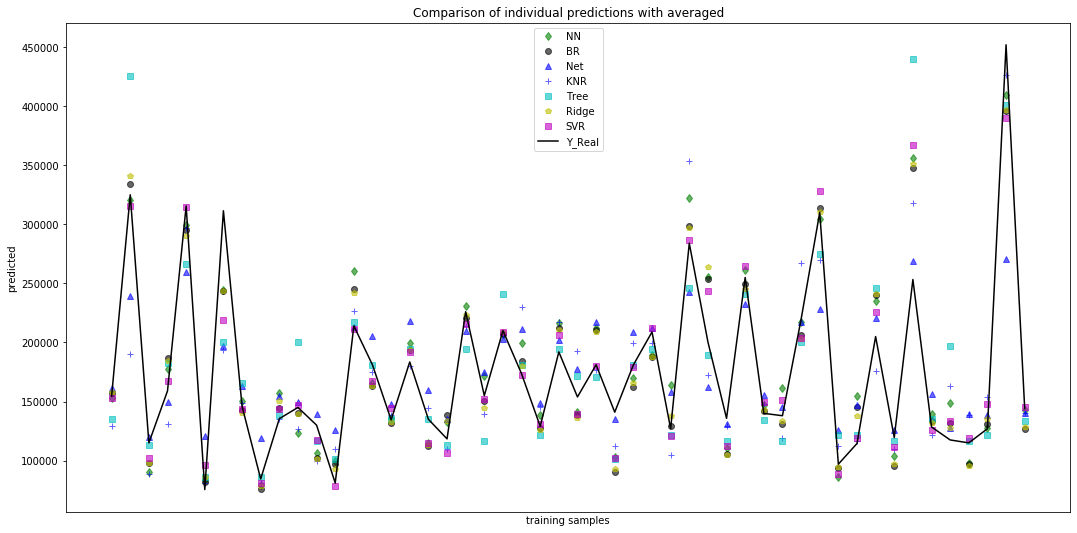

In [122]:

num = 50
xt = Test_X[:num]

alpha = 0.6
plt.figure(figsize=(18,9))
plt.plot(Raw_NN.predict(xt), 'gd',alpha = alpha, label='NN')
plt.plot(Raw_BR.predict(xt), 'ko',alpha = alpha, label='BR')
plt.plot(Raw_Net.predict(xt), 'b^',alpha = alpha, label='Net')
plt.plot(Raw_KNR.predict(xt), 'b+',alpha = alpha, label='KNR')
plt.plot(Raw_Tree.predict(xt), 'cs',alpha = alpha, label='Tree')
plt.plot(Raw_ridge.predict(xt), 'yp',alpha = alpha, label='Ridge')
plt.plot(Raw_svr.predict(xt), 'ms',alpha = alpha, label='SVR')

# plt.plot(ereg.predict(xt), 'r*',alpha = alpha, label='VotingRegressor')
# plt.plot(stregr.predict(xt), 'm*',alpha = alpha, label='StackingRegressor')


plt.plot(Test_Y[:num], 'black', label='Y_Real')


plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.savefig('result.pdf')
plt.show()


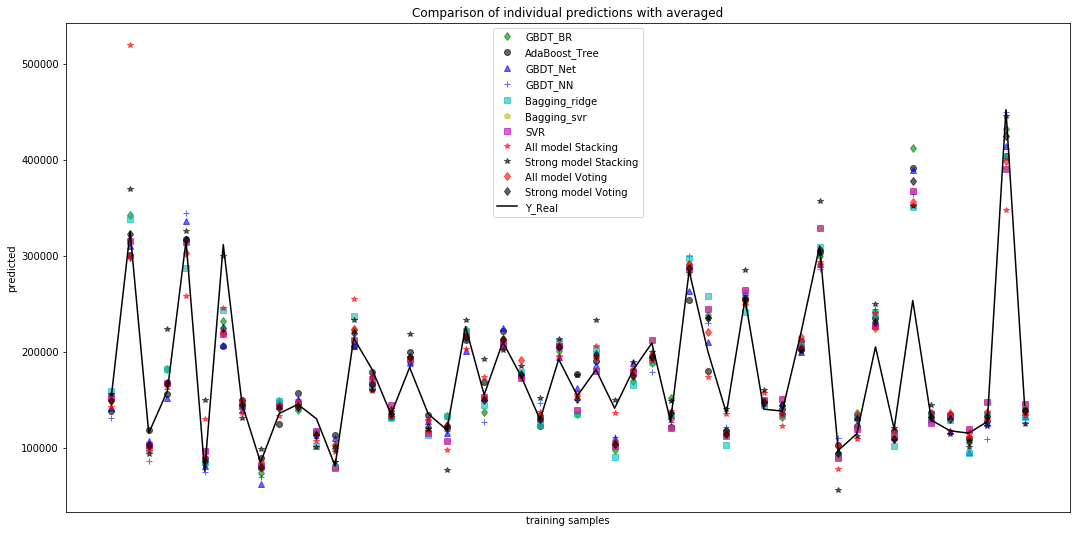

In [137]:

num = 50
xt = Test_X[:num]

alpha = 0.6
plt.figure(figsize=(18,9))
plt.plot(GBDT_BR.predict(xt), 'gd',alpha = alpha, label='GBDT_BR')
plt.plot(AdaBoost_Tree.predict(xt), 'ko',alpha = alpha, label='AdaBoost_Tree')
plt.plot(GBDT_Net.predict(xt), 'b^',alpha = alpha, label='GBDT_Net')
plt.plot(GBDT_NN.predict(xt), 'b+',alpha = alpha, label='GBDT_NN')
plt.plot(Bagging_ridge.predict(xt), 'cs',alpha = alpha, label='Bagging_ridge')
plt.plot(Bagging_svr.predict(xt), 'yp',alpha = alpha, label='Bagging_svr')
plt.plot(Raw_svr.predict(xt), 'ms',alpha = alpha, label='SVR')

plt.plot(all_stregr.predict(xt), 'r*',alpha = alpha, label='All model Stacking')
plt.plot(strong_stregr.predict(xt), 'k*',alpha = alpha, label='Strong model Stacking')


plt.plot(VR_all_models.predict(xt), 'rd',alpha = alpha, label="All model Voting")
plt.plot(VR_strong_models.predict(xt), 'kd',alpha = alpha, label='Strong model Voting')



plt.plot(Test_Y[:num], 'black', label='Y_Real')


plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.savefig('result.pdf')
plt.show()



TODO:
Stacking did not improve result ?
Both Stacking and voting did not improve whatsoever ?